In [206]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# set defaults
plt.style.use('seaborn-white')   # seaborn custom plot style
plt.rc('figure', dpi=100, figsize=(7, 5))   # set default size/resolution
plt.rc('font', size=12)   # font size

tips = sns.load_dataset('tips')

# Model Validation

## Model building involves choices

* How much feature complexity?
* What model type? Which model parameters?
* How do we make these choices?

<img src="imgs/image_0.png">

![overfit](imgs/under-over-fit.png)

## Generic features increase model expressivity

* Consider periodic sales data example
* Linear combinations of radial basis functions can fit *any* curve.
    - How do you know how many? Which ones?

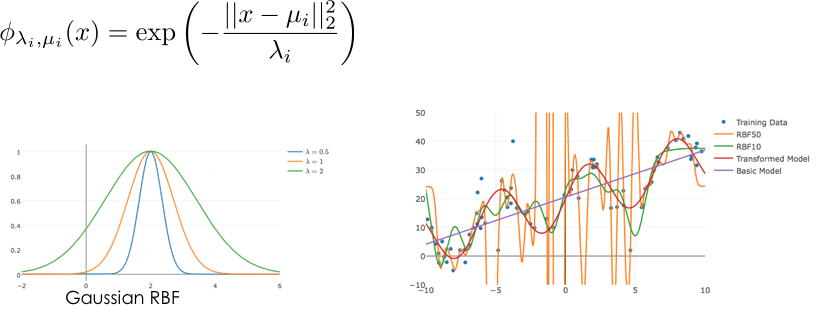

## Sales data: training error
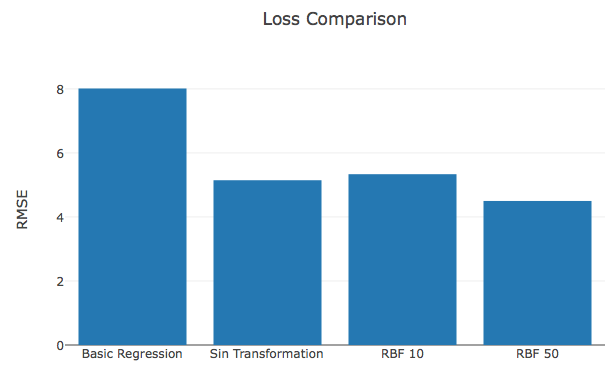

## Sales data: training vs test error
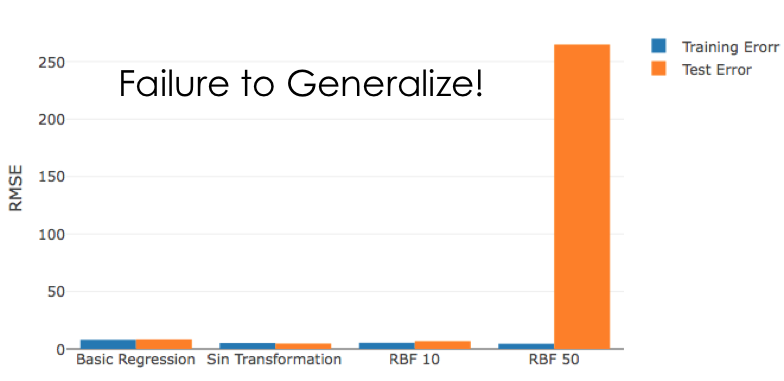

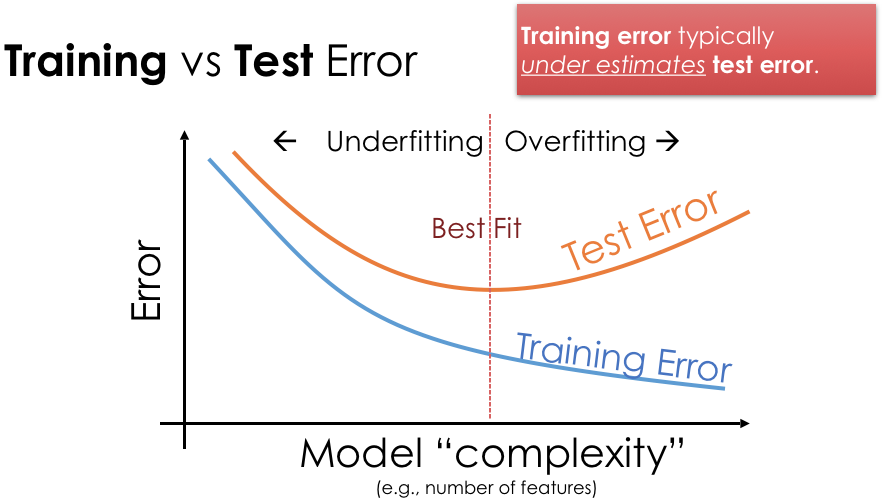

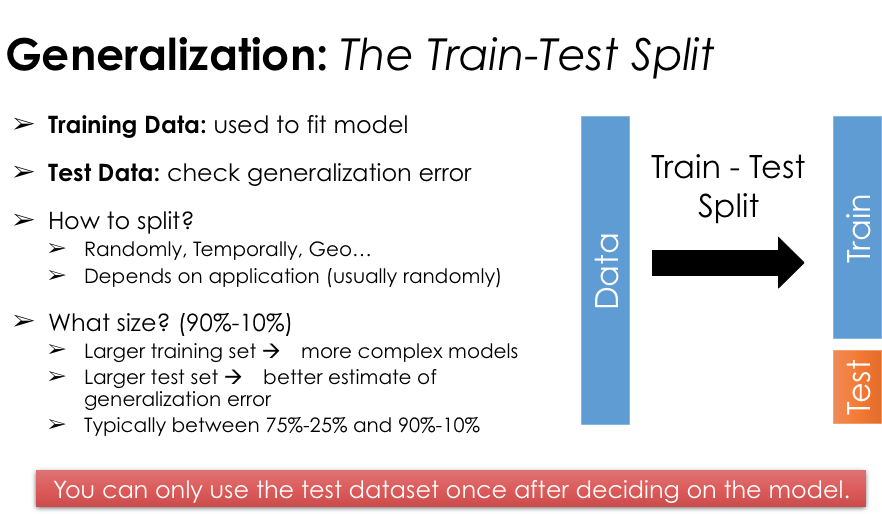

### Question: training-test splits with time-series

* Suppose you want to predict stock market performance
* Dataset: 2017 stock data
* Does a simple 'train-test-split' work? Why or why not?
* How would you train-test-split this data?

## Train-Test Assessment

Hand-tuning parameters for a model:
* Fit model attempt #1 with train; check error on test (ok).
* Fit model attempt #2 with train; check error on test (better).
* Fit model attempt #3 with train; check error on test (best).

Did our parameter select just over-fit to the test set? Need another split for **validation**!


<img src="imgs/holdout.jpg" width="100%">

### Hold-out strategy

* Leaves the test set independent of the model training.
* Computationally similar to using only train-test.
* High variance in model selection, as the validation set:
    - is chosen only once, outliers
    - may be small

<img src="imgs/kfold.jpg" width="75%">

## k-fold cross-validation

1. Shuffle the dataset randomly.
2. Split the dataset into k groups
3. For each unique group:
    - Take the group as a hold out or test data set
    - Take the remaining groups as a training data set
    - Fit a model on the training set and evaluate it on the test set
    - Retain the evaluation score and discard the model
4. Summarize the skill of the model using the sample of model evaluation scores


## Cross-validation strategy

* Less variation: it uses the entire training set; fits model multiple times.
* Higher computational costs: a model is trained K times at the validation step.

## Cross-validation in Scikit-Learn

* Cross-validation "by-hand" using `KFold`:
```
KFold(numfolds, shuffle, random_state)
```

In [207]:
# scikit-learn k-fold cross-validation

from sklearn.model_selection import KFold
# data sample
data = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

# prepare cross validation
kfold = KFold(3, shuffle=True, random_state=1)

# enumerate splits
for train, test in kfold.split(data):
    print('train: %s, test: %s' % (data[train], data[test]))

train: [0.1 0.4 0.5 0.6], test: [0.2 0.3]
train: [0.2 0.3 0.4 0.6], test: [0.1 0.5]
train: [0.1 0.2 0.3 0.5], test: [0.4 0.6]


## Cross-validation in Scikit-Learn

* Cross-validation for sklearn model pipelines in `sklearn.model_selection`:
```
cross_val_score(estimator, data, target, cv)
```
* `cv` parameter (e.g. number of folds) for splitting the data.
* Runs the model builds in parallel on multiple cores.

In [208]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [209]:
tips = sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [210]:
X = tips[['total_bill', 'size']]
y = tips.tip

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

pipeline = Pipeline([('lr', LinearRegression())])

In [212]:
scores = cross_val_score(pipeline, X_train, y_train, cv=5)
scores  # R^2

array([0.6231107 , 0.48596203, 0.24267208, 0.02177999, 0.52093947])

In [213]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('lr', LinearRegression())])

In [214]:
pipeline.score(X_test, y_test)

0.45588779134484425

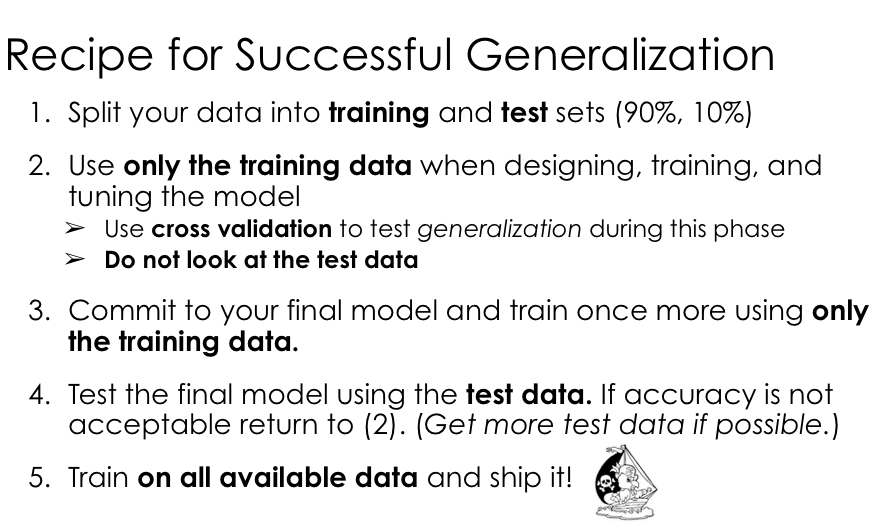

## Example: polynomial regression

In [215]:
X = np.linspace(0, 10, 100)[:, None]
y = (.4 * X + np.cos(np.pi / 4 * X) + np.random.normal(0, .2, size=(100,1))).flatten()

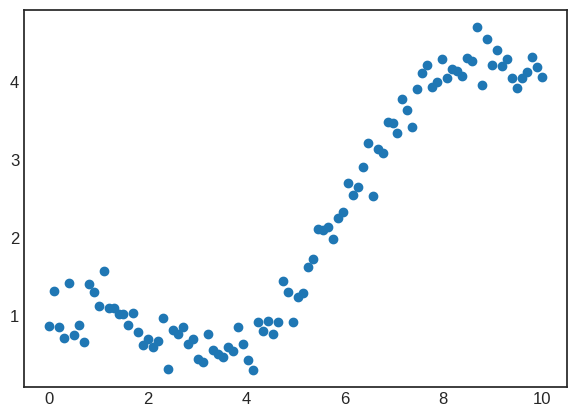

In [216]:
plt.scatter(X, y)

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [218]:
from sklearn.preprocessing import PolynomialFeatures

transformers = [PolynomialFeatures(i) for i in range(1, 10)]

pipelines = [
    Pipeline([('poly', tr), ('lr', LinearRegression())])
    for tr in transformers
]

for pipeline in pipelines:
    pipeline.fit(X_train, y_train)
    
train_scores = [p.score(X_train, y_train) for p in pipelines]

In [219]:
train_scores

[0.807157356347536,
 0.8751457854122845,
 0.9425424306046234,
 0.972878912131638,
 0.9809091737665112,
 0.9819010864609152,
 0.9820642845582328,
 0.9820895141320035,
 0.9821254446851015]

In [220]:
validation_scores = [cross_val_score(p, X_test, y_test) for p in pipelines]
validation_scores

[array([ 0.66408725,  0.26210971, -9.2590403 ,  0.7272049 ,  0.71756404]),
 array([ 0.75519072,  0.64671412, -2.40365842,  0.84717054,  0.86555954]),
 array([ 0.9161007 ,  0.68626154, -0.27069794,  0.94666033,  0.96181026]),
 array([0.94282284, 0.84790638, 0.39960175, 0.9592454 , 0.99336452]),
 array([0.94762376, 0.88108465, 0.26405474, 0.9547135 , 0.97916297]),
 array([0.59715156, 0.81034867, 0.27359094, 0.94019381, 0.95913219]),
 array([0.6050847 , 0.81358437, 0.25055082, 0.93393443, 0.96364431]),
 array([-1.40934781,  0.82020816, -1.62775714,  0.86162489,  0.9843395 ]),
 array([-5.2044634 ,  0.60608949, -1.81996493,  0.87568483,  0.98728357])]

In [221]:
[arr.mean() for arr in validation_scores]

[-1.3776148800371981,
 0.14219529846348847,
 0.6480269783336545,
 0.8285881783052724,
 0.8053279243357705,
 0.7160834348629079,
 0.7133597258802874,
 -0.0741864793254692,
 -0.9110740879365562]

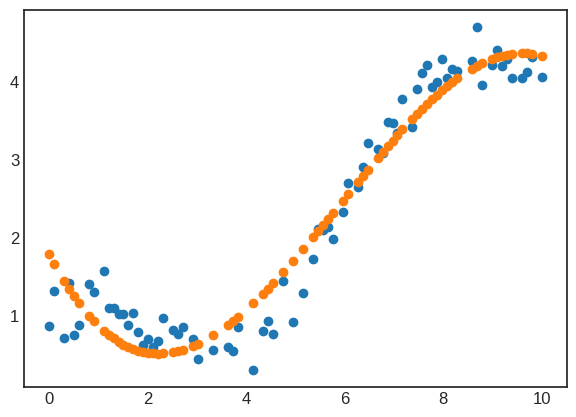

In [222]:
plt.scatter(X_train, y_train)
plt.scatter(X_train, pipelines[2].predict(X_train))

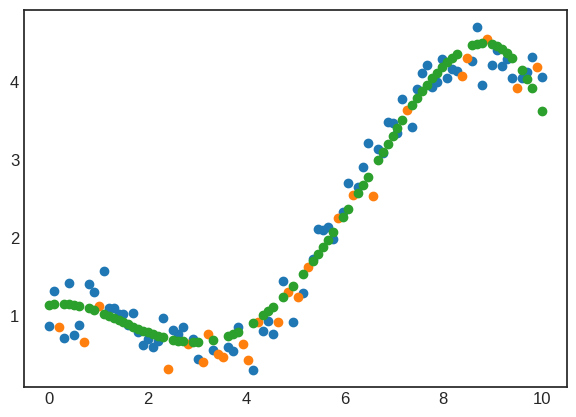

In [223]:
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.scatter(X_train, pipelines[3].predict(X_train))

# Example: Decision Trees

## Example: decision trees for prediction

* Easy to interpret (for small trees); like a flow chart.
* Don't require much feature engineering or scaling.
* Non-parametric; capture non-linear behavior
* We will learn how they behave; learn a little about their internals.

### Examples of when it's good/bad to play tennis

<div class="image-txt-container">
    
* Create a tree that:
    - takes in the current days conditions
    - predicts if the day will be a good day for tennis.


<img src="imgs/tennis.png" width="50%">

</div>

### Example decision tree

<div class="image-txt-container">

* Start with a "root" attribute.
* Split each attribute to maximize separation of target.
* [A tutorial on creating trees](https://medium.com/machine-learning-guy/an-introduction-to-decision-tree-learning-id3-algorithm-54c74eb2ad55)

<img src="imgs/tennis-tree.png" width="50%">

</div>

### Trees are split to maximize the purity of the leaf nodes

* A "perfect" tree is one which has perfectly separated the classes.
* Separation is measured statistically (e.g. "cross-entropy" or "gini")
<img src="imgs/tree-impurity.png" width="75%">

### Example decision tree

<div class="image-txt-container">

* A few **Parameters:**
* Tree-depth
* minimum observation for a leaf  (say, fewer than 50 observations no more splitting)
* splitting criterion (entropy, gini)

<img src="imgs/tennis-tree.png" width="50%">

</div>

### A smaller decision tree

<div class="image-txt-container">

* Restricting the tree-depth parameter to 1:
* Creates a simpler tree
* Creates a biased estimate

<img src="imgs/small-tree.png" width="20%">

</div>

### Example: Predicting Diabetes

* Given health measurements, can you predict whether an individual will develop diabetes?
* Classification of health outcomes: 0=NO DIABETES and 1=DIABETES
* We will use 'accuracy' to evaluate the model (not necessarily the best choice!)

In [225]:
diabetes = pd.read_csv('data/diabetes.csv')
diabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [226]:
diabetes[['Pregnancies','Insulin', 'BMI', 'Glucose', 'Outcome']].describe()

Pregnancies     Insulin         BMI     Glucose     Outcome
count   768.000000  768.000000  768.000000  768.000000  768.000000
mean      3.845052   79.799479   31.992578  120.894531    0.348958
std       3.369578  115.244002    7.884160   31.972618    0.476951
min       0.000000    0.000000    0.000000    0.000000    0.000000
25%       1.000000    0.000000   27.300000   99.000000    0.000000
50%       3.000000   30.500000   32.000000  117.000000    0.000000
75%       6.000000  127.250000   36.600000  140.250000    1.000000
max      17.000000  846.000000   67.100000  199.000000    1.000000

In [243]:
from sklearn.tree import DecisionTreeClassifier

In [244]:
# features
X = diabetes.drop('Outcome', axis=1)
# outcome
y = diabetes.Outcome

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [246]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choos

In [247]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [248]:
clf.score(X_train, y_train)

1.0

In [249]:
clf.score(X_test, y_test)

0.696969696969697

In [250]:
# look at the importance of each feature in our tree model
dict(zip(X.columns, clf.feature_importances_))

{'Pregnancies': 0.05264731534464915,
 'Glucose': 0.29356214933900493,
 'BloodPressure': 0.08420556456362092,
 'SkinThickness': 0.05698807555821704,
 'Insulin': 0.08315759470406549,
 'BMI': 0.16376085832562767,
 'DiabetesPedigreeFunction': 0.14794647889610135,
 'Age': 0.11773196326871348}

In [251]:
# maximum depth
clf.tree_.max_depth

16

In [252]:
# node count
clf.tree_.node_count

187

In [265]:
clf_small = DecisionTreeClassifier(max_depth=4)
clf_small.fit(X_train, y_train)
clf_small.score(X_train, y_train)

0.8119180633147114

In [266]:
clf_small.score(X_test, y_test)

0.7402597402597403

In [267]:
from util import tree_to_code

In [268]:
tree_to_code(clf_small, X.columns)

def tree(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age):
  if Glucose <= 133.5:
    if Age <= 27.5:
      if BMI <= 32.30000114440918:
        if DiabetesPedigreeFunction <= 0.671999990940094:
          return [[98.  0.]]
        else:  # if DiabetesPedigreeFunction > 0.671999990940094
          return [[15.  1.]]
      else:  # if BMI > 32.30000114440918
        if BloodPressure <= 22.0:
          return [[0. 2.]]
        else:  # if BloodPressure > 22.0
          return [[61. 12.]]
    else:  # if Age > 27.5
      if BMI <= 26.149999618530273:
        if BMI <= 9.649999618530273:
          return [[0. 2.]]
        else:  # if BMI > 9.649999618530273
          return [[31.  0.]]
      else:  # if BMI > 26.149999618530273
        if DiabetesPedigreeFunction <= 0.5609999895095825:
          return [[78. 30.]]
        else:  # if DiabetesPedigreeFunction > 0.5609999895095825
          return [[16. 28.]]
  else:  # if Glucose > 133.5
    i

In [269]:
tree_to_code(clf, X.columns)

def tree(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age):
  if Glucose <= 133.5:
    if Age <= 27.5:
      if BMI <= 32.30000114440918:
        if DiabetesPedigreeFunction <= 0.671999990940094:
          return [[98.  0.]]
        else:  # if DiabetesPedigreeFunction > 0.671999990940094
          if DiabetesPedigreeFunction <= 0.6849999725818634:
            return [[0. 1.]]
          else:  # if DiabetesPedigreeFunction > 0.6849999725818634
            return [[15.  0.]]
      else:  # if BMI > 32.30000114440918
        if BloodPressure <= 22.0:
          return [[0. 2.]]
        else:  # if BloodPressure > 22.0
          if DiabetesPedigreeFunction <= 0.5094999969005585:
            if BMI <= 45.39999961853027:
              if DiabetesPedigreeFunction <= 0.13450000435113907:
                if Insulin <= 26.5:
                  return [[0. 1.]]
                else:  # if Insulin > 26.5
                  return [[1. 0.]]
             

## How to select model parameters?

* Each combination of model parameters requires: 
    - fitting a model; evaluating the model; comparing performance.
* This leads to training perhaps *thousands* of models!
    - How to do this in a computationally feasible way?
    - How to keep your code clean to keep track?

## How to select model parameters?

* How to select in a computationally feasible way?
    - Trying every combination ('grid search') works for smaller data/models.
    - Sampling possible combinations of parameters using probabilistic reasoning.
    
* How to keep your code clean to keep track?
    - The `sklearn.model_selection` package.